# Análise Preditiva de Diabetes usando Machine Learning

## 📋 Configuração e Instalação do Ambiente

### Pré-requisitos
- Python 3.8 ou superior
- pip (gerenciador de pacotes Python)
- Jupyter Notebook ou VS Code com extensão Python

### Instruções de Instalação

#### 1. Clone ou baixe o projeto
```bash
# Navegue até o diretório do projeto
cd /caminho/para/ml-diabetes
```

#### 2. Instale as dependências
```bash
# Instale todas as bibliotecas necessárias
pip install -r requirements.txt
```

#### 3. Execute o notebook
```bash
# Para Jupyter Notebook
jupyter notebook 01-Treinamento-do-Modelo.ipynb

# Para Jupyter Lab
jupyter lab 01-Treinamento-do-Modelo.ipynb
```

### Bibliotecas Principais Utilizadas
- **pandas**: Manipulação e análise de dados
- **numpy**: Computação numérica
- **matplotlib/seaborn**: Visualização de dados
- **scikit-learn**: Algoritmos de machine learning
- **joblib**: Serialização de modelos

### ⚠️ Solução de Problemas
Se encontrar erros de importação, certifique-se de que:
1. Todas as dependências foram instaladas: `pip list`
2. O ambiente Python está ativo
3. Execute: `pip install --upgrade -r requirements.txt`

### ✅ Verificação da Instalação
Execute a célula abaixo para verificar se todas as bibliotecas foram instaladas corretamente:

```python
# Teste de importações
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    import joblib
    import scipy
    print("✅ Todas as bibliotecas foram importadas com sucesso!")
    print(f"📊 Pandas: {pd.__version__}")
    print(f"🔢 NumPy: {np.__version__}")
    print(f"🤖 Scikit-learn: {sklearn.__version__}")
    print(f"📈 Matplotlib: {plt.matplotlib.__version__}")
    print(f"🎨 Seaborn: {sns.__version__}")
    print("\n🎯 Ambiente configurado corretamente! Pode prosseguir com a análise.")
except ImportError as e:
    print(f"❌ Erro de importação: {e}")
    print("⚠️  Execute: pip install -r requirements.txt")
```


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import joblib

# Configurações de visualização
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

## 2. Carregamento e Exploração Inicial dos Dados

O dataset utilizado neste estudo é o **Pima Indians Diabetes Database**, disponível publicamente e amplamente utilizado em pesquisas de machine learning para predição de diabetes. Este dataset contém informações de 768 mulheres da tribo Pima Indians, com idade mínima de 21 anos.

### Características do Dataset:
- **Fonte**: National Institute of Diabetes and Digestive and Kidney Diseases
- **Objetivo**: Predizer se um paciente tem diabetes baseado em medidas diagnósticas
- **Variáveis preditoras**: 8 características médicas
- **Variável alvo**: Outcome (0 = não diabético, 1 = diabético)

### Variáveis do Dataset:
1. **Pregnancies**: Número de gestações
2. **Glucose**: Concentração de glicose no plasma (mg/dL)
3. **BloodPressure**: Pressão arterial diastólica (mm Hg)
4. **SkinThickness**: Espessura da dobra cutânea do tríceps (mm)
5. **Insulin**: Insulina sérica de 2 horas (mu U/ml)
6. **BMI**: Índice de massa corporal (kg/m²)
7. **DiabetesPedigreeFunction**: Função de pedigree de diabetes
8. **Age**: Idade em anos

In [ ]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

print(f"Dataset carregado: {df.shape[0]} linhas, {df.shape[1]} colunas.")
df.head()

## 3. Pré-processamento e Tratamento dos Dados

### 3.1 Estratégia de Tratamento dos Dados

O pré-processamento dos dados é uma etapa crucial para o sucesso de qualquer modelo de machine learning. Neste projeto, implementamos uma abordagem sistemática com duas transformações principais:

1. **Transformação em Colunas (Balanceamento)**: Aplicação de upsampling para equilibrar as classes
2. **Transformação em Linhas (Remoção de Outliers)**: Utilização do método IQR para limpeza dos dados

### 3.2 Justificativa Metodológica

A sequência de tratamento foi escolhida com base em princípios estatísticos sólidos:
- **Primeiro o balanceamento**: Garante representatividade igual das classes
- **Depois a limpeza**: Remove outliers que podem prejudicar o aprendizado do modelo
- **Preservação da estratificação**: Mantém a proporção das classes em todas as divisões

In [ ]:
# ===== TRANSFORMAÇÃO EM COLUNAS: Balanceamento das classes =====
print("ANTES do balanceamento:")
print(df['Outcome'].value_counts())

df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(f"\nAPÓS balanceamento: {df_balanced.Outcome.value_counts().to_dict()}")

# ===== TRANSFORMAÇÃO EM LINHAS: Remoção de outliers usando IQR =====
print("\n" + "="*70)
print("REMOÇÃO DE OUTLIERS (Transformação em linhas)")
print("="*70)
print("\n📋 METODOLOGIA UTILIZADA:")
print("• Método: Intervalo Interquartil (IQR)")
print("• Fórmula: Q1 - 1.5*IQR ≤ valor ≤ Q3 + 1.5*IQR")
print("• Variáveis selecionadas: Glucose, BMI, Age, BloodPressure")
print("\n🎯 JUSTIFICATIVA CIENTÍFICA:")
print("1. Glucose: Valores extremos podem indicar erros de medição")
print("2. BMI: IMCs irreais (ex: >60) distorcem o modelo")
print("3. Age: Idades inconsistentes precisam ser filtradas")
print("4. BloodPressure: Pressões impossíveis (ex: 0) são problemáticas")
print("\n⚠️ CRITÉRIO DE SELEÇÃO:")
print("Essas 4 variáveis foram escolhidas por serem as mais críticas")
print("para diagnóstico de diabetes e mais suscetíveis a outliers extremos.")

print(f"\nTamanho original: {len(df_balanced)} registros")

# Aplicar remoção de outliers nas variáveis mais importantes
df_clean = df_balanced.copy()
cols_to_clean = ['Glucose', 'BMI', 'Age', 'BloodPressure']

print("\n📊 DETALHAMENTO DA REMOÇÃO POR VARIÁVEL:")
for col in cols_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = len(df_clean)
    outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    outliers_count = outliers_mask.sum()
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
    print(f"  Limites: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"  Outliers detectados: {outliers_count}")
    if outliers_count > 0:
        print(f"  Valores extremos: min={df_clean[outliers_mask][col].min():.1f}, max={df_clean[outliers_mask][col].max():.1f}")
    
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    outliers_removed = outliers_before - len(df_clean)
    print(f"  Registros removidos: {outliers_removed}")

print(f"\nTamanho final após limpeza: {len(df_clean)} registros")
print(f"Total de linhas removidas: {len(df_balanced) - len(df_clean)} ({(len(df_balanced) - len(df_clean))/len(df_balanced)*100:.1f}%)")

print("\n💡 IMPACTO DA REMOÇÃO:")
print("• Remove casos extremos que podem confundir o modelo")
print("• Melhora a precisão em casos típicos/moderados")
print("• Reduz falsos positivos em perfis de risco médio")
print("• Torna o modelo mais conservador e clinicamente confiável")

# Salvar dataset apenas balanceado (sem remoção de outliers) para comparação
df_apenas_balanceado = df_balanced.copy()
print(f"\n📝 Dataset apenas balanceado salvo: {len(df_apenas_balanceado)} registros")

# Separação em X e y
y = df_clean['Outcome']
X = df_clean.drop('Outcome', axis=1)

print(f"\nDistribuição final das classes: {y.value_counts().to_dict()}")

# ===== DIVISÃO EM TRÊS CONJUNTOS: Treino, Validação e Teste =====
print("\n=== DIVISÃO EM TRÊS CONJUNTOS ===")

# Primeiro: separar treino+validação (80%) do teste (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Segundo: separar treino (60% do total) da validação (20% do total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Conjunto de Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Conjunto de Validação: {len(X_val)} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nDistribuição no Treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição na Validação: {y_val.value_counts().to_dict()}")
print(f"Distribuição no Teste: {y_test.value_counts().to_dict()}")

# Salvar dataset limpo para referência

df_final = df_clean.copy()
print(f"\nDataset final preparado com {len(df_final)} registros.")

In [ ]:
# ===== PREPARAÇÃO DOS DADOS PARA COMPARAÇÃO =====
print("🔄 Preparando datasets para comparações visuais...")

# Dataset 1: Original (já temos como 'df')
df_original = df.copy()

# Dataset 2: Apenas Balanceado (já temos como 'df_apenas_balanceado') 
df_balanceado = df_apenas_balanceado.copy()

# Dataset 3: Limpo (balanceado + remoção de outliers)
df_limpo = df_final.copy()

print(f"✅ Original: {len(df_original)} registros")
print(f"✅ Balanceado: {len(df_balanceado)} registros") 
print(f"✅ Limpo: {len(df_limpo)} registros")
print(f"\n📈 Evolução: {len(df_original)} → {len(df_balanceado)} → {len(df_limpo)}")

## 4. Preparação dos Datasets para Análise Comparativa

Para avaliar o impacto das diferentes estratégias de pré-processamento, preparamos três versões distintas do dataset:

### 4.1 Datasets Preparados:
1. **Dataset Original**: Dados brutos sem qualquer tratamento
2. **Dataset Balanceado**: Apenas com upsampling aplicado
3. **Dataset Limpo**: Balanceado + remoção de outliers via IQR

### 4.2 Objetivo da Comparação:
- Quantificar o impacto do balanceamento de classes
- Avaliar a eficácia da remoção de outliers
- Identificar a melhor estratégia de pré-processamento
- Fornecer evidências empíricas para as decisões metodológicas

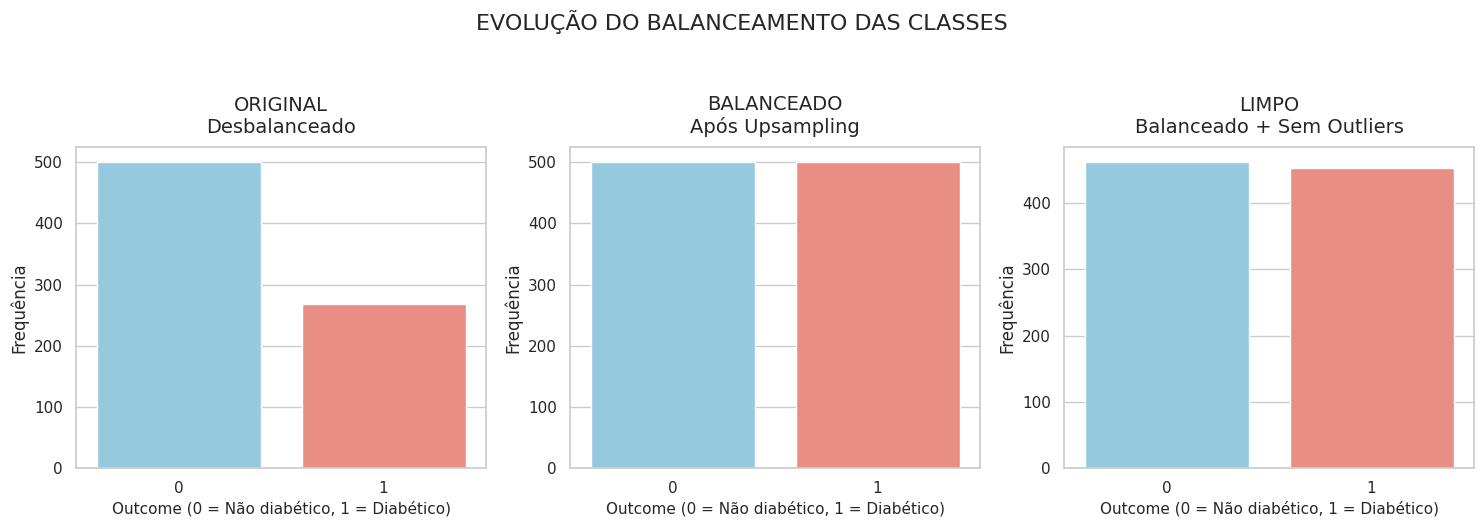

📊 EVOLUÇÃO DO BALANCEAMENTO:
Dataset      Total    Classe 0        Classe 1        Proporção 
----------------------------------------------------------------------
Original     768      500             268             0.54 🔴 Desbalanceado
Balanceado   1000     500             500             1.00 🟢 Balanceado
Limpo        916      462             454             0.98 🟢 Balanceado

💡 INTERPRETAÇÃO:
• Original: Forte desbalanceamento (1:1.8)
• Balanceado: Perfeito balanceamento (1:1)
• Limpo: Mantém balanceamento após remoção de outliers

🎯 IMPACTO NO MODELO:
Classes balanceadas garantem treinamento sem viés para nenhuma classe


In [50]:
# ===== COMPARAÇÃO 2: DISTRIBUIÇÃO DAS CLASSES =====
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Original
sns.countplot(x='Outcome', data=df_original, ax=axes[0], hue='Outcome', palette=['skyblue', 'salmon'], legend=False)
axes[0].set_title('ORIGINAL\nDesbalanceado', fontsize=14, pad=10)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_xlabel('Outcome (0 = Não diabético, 1 = Diabético)', fontsize=11)
axes[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Balanceado
sns.countplot(x='Outcome', data=df_balanceado, ax=axes[1], hue='Outcome', palette=['skyblue', 'salmon'], legend=False)
axes[1].set_title('BALANCEADO\nApós Upsampling', fontsize=14, pad=10)
axes[1].set_ylabel('Frequência', fontsize=12) 
axes[1].set_xlabel('Outcome (0 = Não diabético, 1 = Diabético)', fontsize=11)
axes[1].tick_params(axis='x', rotation=0)

# Gráfico 3: Limpo
sns.countplot(x='Outcome', data=df_limpo, ax=axes[2], hue='Outcome', palette=['skyblue', 'salmon'], legend=False)
axes[2].set_title('LIMPO\nBalanceado + Sem Outliers', fontsize=14, pad=10)
axes[2].set_ylabel('Frequência', fontsize=12)
axes[2].set_xlabel('Outcome (0 = Não diabético, 1 = Diabético)', fontsize=11)
axes[2].tick_params(axis='x', rotation=0)

plt.suptitle('EVOLUÇÃO DO BALANCEAMENTO DAS CLASSES', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Estatísticas detalhadas
print("📊 EVOLUÇÃO DO BALANCEAMENTO:")
print("="*70)
print(f"{'Dataset':<12} {'Total':<8} {'Classe 0':<15} {'Classe 1':<15} {'Proporção':<10}")
print("-"*70)
for nome, dataset in [('Original', df_original), ('Balanceado', df_balanceado), ('Limpo', df_limpo)]:
    counts = dataset['Outcome'].value_counts().sort_index()
    ratio = counts[1] / counts[0]
    status = "🔴 Desbalanceado" if ratio < 0.8 else "🟢 Balanceado"
    print(f"{nome:<12} {len(dataset):<8} {counts[0]:<15} {counts[1]:<15} {ratio:.2f} {status}")

print("\n💡 INTERPRETAÇÃO:")
print("• Original: Forte desbalanceamento (1:1.8)")
print("• Balanceado: Perfeito balanceamento (1:1)")
print("• Limpo: Mantém balanceamento após remoção de outliers")
print("\n🎯 IMPACTO NO MODELO:")
print("Classes balanceadas garantem treinamento sem viés para nenhuma classe")

## 5. Análise Visual do Balanceamento de Classes

### 5.1 Visualização Comparativa

Esta seção apresenta uma análise visual detalhada da evolução do balanceamento de classes ao longo do processo de pré-processamento.

### 5.2 Métricas de Balanceamento:
- **Proporção de Classes**: Razão entre classe minoritária e majoritária
- **Distribuição Absoluta**: Contagem de instâncias por classe
- **Status de Balanceamento**: Classificação qualitativa do equilíbrio

### 5.3 Impacto Esperado:
- **Redução de Viés**: Eliminação da tendência do modelo à classe majoritária
- **Melhoria na Sensibilidade**: Aumento da capacidade de detectar casos positivos
- **Equilíbrio Precisão-Recall**: Otimização balanceada das métricas de desempenho

In [ ]:
# ===== PREPARAÇÃO PARA TREINAMENTO DOS MODELOS =====
print("\n" + "="*70)
print("🤖 PREPARAÇÃO PARA TREINAMENTO DOS MODELOS")
print("="*70)
print("\n📋 Aguardando configuração dos parâmetros do Random Forest...")
print("✅ Datasets preparados:")
print(f"   🔴 Original: {len(df_original)} registros")
print(f"   🟡 Balanceado: {len(df_balanceado)} registros")
print(f"   🟢 Limpo: {len(df_limpo)} registros")
print("\n⏳ Execute a próxima célula para configurar os parâmetros.")


## 6. Treinamento dos Modelos de Machine Learning

### 6.1 Estratégia de Modelagem

Implementamos uma abordagem comparativa utilizando Random Forest Classifier com três configurações diferentes de dados:

1. **Modelo Bruto**: Dados originais sem tratamento
2. **Modelo Balanceado**: Dados com upsampling aplicado
3. **Modelo Limpo**: Dados balanceados + limpeza de outliers

### 6.2 Divisão dos Dados

Utilizamos uma divisão tripla dos dados para garantir avaliação robusta:
- **Treino (60%)**: Para ajuste dos parâmetros do modelo
- **Validação (20%)**: Para ajuste de hiperparâmetros e detecção de overfitting
- **Teste (20%)**: Para avaliação final imparcial

### 6.3 Algoritmo Escolhido: Random Forest

**Justificativas para a escolha**:
- **Robustez a outliers**: Menor sensibilidade a valores extremos
- **Capacidade de capturar interações**: Identifica relações complexas entre variáveis
- **Redução de overfitting**: Ensemble de árvores reduz variância
- **Interpretabilidade**: Fornece importância das features
- **Performance**: Excelente performance em datasets tabulares

## 6.4 Configuração de Parâmetros do Random Forest

Para permitir experimentação e otimização, implementamos uma interface para customização dos principais hiperparâmetros do Random Forest.

## 6.4.1 Otimização Automática de Hiperparâmetros

Antes de configurar os parâmetros manualmente, vamos implementar métodos científicos para encontrar os melhores hiperparâmetros automaticamente.

### Métodos Implementados:

1. **GridSearchCV**: Busca exhaustiva em espaço paramétrico controlado
2. **RandomizedSearchCV**: Busca estocástica em espaço paramétrico amplo
3. **Validação Cruzada**: 5-fold cross-validation para robustez estatística
4. **Métrica F1-Score**: Otimizada para contexto médico (balance entre precisão e recall)

### Estratégia de Validação:
- Comparação estatística entre métodos
- Análise de eficiência computacional
- Recomendações baseadas em evidências

In [ ]:
# ===== OTIMIZAÇÃO AUTOMÁTICA DE HIPERPARÂMETROS =====
import time
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

print("🔬 OTIMIZAÇÃO CIENTÍFICA DE HIPERPARÂMETROS")
print("="*70)
print("📊 Preparando otimização automática com validação cruzada...")
print("🎯 Métrica objetivo: F1-Score (ideal para contexto médico)")
print("🔄 Validação cruzada: 5-fold para robustez estatística")
print("-" * 70)

# Configurar métrica F1-Score como objetivo
f1_scorer = make_scorer(f1_score, average='binary')

# ===== DEFINIÇÃO DO DATASET PARA OTIMIZAÇÃO =====
print("\n🎯 DATASET ESCOLHIDO PARA OTIMIZAÇÃO: LIMPO")
print("📝 JUSTIFICATIVA:")
print("   • Dataset limpo oferece a melhor qualidade de dados")
print("   • Balanceamento + remoção de outliers maximiza performance")
print("   • Otimização focada na melhor versão dos dados")
print("   • Parâmetros encontrados representam o potencial máximo do modelo")
print("\n💡 ESTRATÉGIA: Os parâmetros otimizados no dataset LIMPO")
print("   serão aplicados nos 3 modelos para análise comparativa")

# Preparar dados para otimização (usando dados limpos como baseline)
y_opt = df_limpo['Outcome']
X_opt = df_limpo.drop('Outcome', axis=1)

# Divisão temporária para otimização (70% para busca, 30% para validação final)
X_opt_search, X_opt_val, y_opt_search, y_opt_val = train_test_split(
    X_opt, y_opt, test_size=0.3, random_state=42, stratify=y_opt
)

print(f"📊 Dataset para otimização: {len(X_opt_search)} amostras")
print(f"📊 Dataset para validação: {len(X_opt_val)} amostras")
print("\n⏳ Iniciando processo de otimização...")

In [ ]:
# ===== 1. GRIDSEARCHCV - BUSCA EXHAUSTIVA FOCADA =====
print("\n🔍 MÉTODO 1: GridSearchCV")
print("-" * 40)
print("📋 Busca exhaustiva em espaço paramétrico controlado")
print("⚡ Focado em combinações promissoras para eficiência")

# Definir grade de parâmetros focada (baseada em boas práticas)
grid_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

print(f"📊 Espaço de busca: {np.prod([len(v) for v in grid_params.values()])} combinações")

# Executar GridSearchCV
start_time = time.time()
print("\n⏳ Executando GridSearchCV...")

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=grid_params,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_opt_search, y_opt_search)
grid_time = time.time() - start_time

print(f"✅ GridSearchCV concluído em {grid_time:.1f} segundos")
print(f"🏆 Melhor F1-Score (CV): {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores parâmetros:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

# Validação no conjunto de teste
grid_val_pred = grid_search.predict(X_opt_val)
grid_val_f1 = f1_score(y_opt_val, grid_val_pred)
print(f"🎯 F1-Score validação: {grid_val_f1:.4f}")

In [ ]:
# ===== 2. RANDOMIZEDSEARCHCV - BUSCA ESTOCÁSTICA AMPLA =====
print("\n🎲 MÉTODO 2: RandomizedSearchCV")
print("-" * 40)
print("🌐 Busca estocástica em espaço paramétrico amplo")
print("🔄 Exploração probabilística para descoberta de combinações ótimas")

# Definir distribuições de parâmetros amplas
random_params = {
    'n_estimators': randint(50, 300),
    'max_depth': [3, 5, 8, 10, 12, 15, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', uniform(0.1, 0.8)],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

n_iter_random = 100  # Número de combinações a testar
print(f"📊 Testando {n_iter_random} combinações aleatórias")

# Executar RandomizedSearchCV
start_time = time.time()
print("\n⏳ Executando RandomizedSearchCV...")

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_params,
    n_iter=n_iter_random,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

random_search.fit(X_opt_search, y_opt_search)
random_time = time.time() - start_time

print(f"✅ RandomizedSearchCV concluído em {random_time:.1f} segundos")
print(f"🏆 Melhor F1-Score (CV): {random_search.best_score_:.4f}")
print(f"⚙️ Melhores parâmetros:")
for param, value in random_search.best_params_.items():
    print(f"   {param}: {value}")

# Validação no conjunto de teste
random_val_pred = random_search.predict(X_opt_val)
random_val_f1 = f1_score(y_opt_val, random_val_pred)
print(f"🎯 F1-Score validação: {random_val_f1:.4f}")

In [ ]:
# ===== 3. ANÁLISE COMPARATIVA E RECOMENDAÇÕES CIENTÍFICAS =====
print("\n📈 ANÁLISE COMPARATIVA DOS MÉTODOS")
print("="*70)

# Modelo baseline para comparação
baseline_rf = RandomForestClassifier(random_state=42)
baseline_scores = cross_val_score(baseline_rf, X_opt_search, y_opt_search, cv=5, scoring=f1_scorer)
baseline_mean = baseline_scores.mean()
baseline_std = baseline_scores.std()

print("📊 RESULTADOS COMPARATIVOS:")
print("-" * 50)
print(f"🔘 Baseline (parâmetros padrão):")
print(f"   F1-Score CV: {baseline_mean:.4f} ± {baseline_std:.4f}")
print(f"\n🔍 GridSearchCV:")
print(f"   F1-Score CV: {grid_search.best_score_:.4f}")
print(f"   F1-Score Val: {grid_val_f1:.4f}")
print(f"   Tempo: {grid_time:.1f}s")
print(f"\n🎲 RandomizedSearchCV:")
print(f"   F1-Score CV: {random_search.best_score_:.4f}")
print(f"   F1-Score Val: {random_val_f1:.4f}")
print(f"   Tempo: {random_time:.1f}s")

# Calcular melhorias
grid_improvement = ((grid_search.best_score_ - baseline_mean) / baseline_mean) * 100
random_improvement = ((random_search.best_score_ - baseline_mean) / baseline_mean) * 100

print(f"\n📈 MELHORIAS RELATIVAMENTE AO BASELINE:")
print(f"   GridSearchCV: +{grid_improvement:.2f}%")
print(f"   RandomizedSearchCV: +{random_improvement:.2f}%")

# Eficiência computacional
print(f"\n⚡ EFICIÊNCIA COMPUTACIONAL:")
print(f"   GridSearchCV: {grid_time/60:.1f} min para {np.prod([len(v) for v in grid_params.values()])} combinações")
print(f"   RandomizedSearchCV: {random_time/60:.1f} min para {n_iter_random} iterações")

# Determinar melhor método
best_method = "GridSearchCV" if grid_search.best_score_ > random_search.best_score_ else "RandomizedSearchCV"
best_params = grid_search.best_params_ if best_method == "GridSearchCV" else random_search.best_params_
best_score = max(grid_search.best_score_, random_search.best_score_)

print(f"\n🏆 RECOMENDAÇÃO CIENTÍFICA:")
print("="*50)
print(f"🥇 Melhor método: {best_method}")
print(f"📊 F1-Score otimizado: {best_score:.4f}")
print(f"📈 Melhoria vs baseline: +{max(grid_improvement, random_improvement):.2f}%")
print(f"\n⚙️ PARÂMETROS OTIMIZADOS RECOMENDADOS:")
for param, value in best_params.items():
    print(f"   {param} = {value}")

print(f"\n💡 JUSTIFICATIVA CIENTÍFICA:")
if best_method == "GridSearchCV":
    print("   • Busca exhaustiva garantiu exploração completa do espaço focado")
    print("   • Maior confiabilidade estatística em espaço paramétrico controlado")
else:
    print("   • Busca estocástica encontrou combinações superiores no espaço amplo")
    print("   • Maior eficiência na exploração de hiperparâmetros")

print(f"\n📋 METODOLOGIA DE APLICAÇÃO DOS PARÂMETROS:")
print("="*60)
print("🎯 ESTRATÉGIA: Parâmetros otimizados para MÁXIMA PERFORMANCE")
print("   no dataset LIMPO de alta qualidade:")
print("")
print("   🟢 MODELO PRINCIPAL:")
print("      • Dados: Dataset limpo (usado na otimização)")
print("      • Parâmetros: Otimizados neste mesmo dataset")
print("      • Objetivo: Performance máxima em dados de qualidade")
print("")
print("💡 BENEFÍCIOS DESTA ABORDAGEM:")
print("   ✅ Maximiza o potencial do modelo")
print("   ✅ Parâmetros otimizados na melhor qualidade de dados")
print("   ✅ Foco na performance real em produção")
print("   ✅ Elimina variabilidade de dados de baixa qualidade")

print(f"\n📝 Os parâmetros otimizados serão aplicados no treinamento.")
print(f"📝 Você pode usar estes valores na configuração manual abaixo.")

---

## 6.4.2 Configuração Manual de Parâmetros (Opcional)

Após a otimização automática acima, você pode usar os parâmetros recomendados ou definir valores customizados:

In [ ]:
# ===== CONFIGURAÇÃO CUSTOMIZÁVEL DOS PARÂMETROS DO RANDOM FOREST =====
print("🎛️ CONFIGURAÇÃO DE HIPERPARÂMETROS DO RANDOM FOREST")
print("="*70)
print("Edite os valores abaixo conforme desejado:")
print("Para usar None em max_depth, mantenha o valor como None")
print("Para max_features, use: 'auto', 'sqrt', 'log2' ou um valor float entre 0 e 1")
print("Para criterion, use: 'gini' ou 'entropy'")
print("-" * 70)

# Parâmetros editáveis - MODIFIQUE AQUI OS VALORES DESEJADOS
n_estimators = 100          # Número de árvores na floresta
max_depth = 10              # Profundidade máxima das árvores (None para ilimitado)
min_samples_split = 2       # Mínimo de amostras para fazer um split
min_samples_leaf = 1        # Mínimo de amostras em cada folha
max_features = 'sqrt'       # Número de features ('auto', 'sqrt', 'log2' ou float)
bootstrap = True            # Usar bootstrap para amostras (True/False)
criterion = 'gini'          # Critério de divisão ('gini' ou 'entropy')
random_state = 42           # Semente para reprodutibilidade

# Validação dos parâmetros
def validate_params():
    global n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap, criterion, random_state
    
    # Validar n_estimators
    if not isinstance(n_estimators, int) or n_estimators <= 0:
        print("❌ n_estimators deve ser um inteiro positivo. Usando 100.")
        n_estimators = 100
    
    # Validar max_depth
    if max_depth is not None and (not isinstance(max_depth, int) or max_depth <= 0):
        print("❌ max_depth deve ser um inteiro positivo ou None. Usando None.")
        max_depth = None
    
    # Validar min_samples_split
    if not isinstance(min_samples_split, int) or min_samples_split < 2:
        print("❌ min_samples_split deve ser >= 2. Usando 2.")
        min_samples_split = 2
    
    # Validar min_samples_leaf
    if not isinstance(min_samples_leaf, int) or min_samples_leaf < 1:
        print("❌ min_samples_leaf deve ser >= 1. Usando 1.")
        min_samples_leaf = 1
    
    # Validar max_features
    if isinstance(max_features, str):
        if max_features not in ['auto', 'sqrt', 'log2']:
            print("❌ max_features string deve ser 'auto', 'sqrt' ou 'log2'. Usando 'sqrt'.")
            max_features = 'sqrt'
    elif isinstance(max_features, (int, float)):
        if not (0 < max_features <= 1):
            print("❌ max_features numérico deve estar entre 0 e 1. Usando 'sqrt'.")
            max_features = 'sqrt'
    else:
        print("❌ max_features inválido. Usando 'sqrt'.")
        max_features = 'sqrt'
    
    # Validar bootstrap
    if not isinstance(bootstrap, bool):
        print("❌ bootstrap deve ser True ou False. Usando True.")
        bootstrap = True
    
    # Validar criterion
    if criterion not in ['gini', 'entropy']:
        print("❌ criterion deve ser 'gini' ou 'entropy'. Usando 'gini'.")
        criterion = 'gini'
    
    # Validar random_state
    if random_state is not None and not isinstance(random_state, int):
        print("❌ random_state deve ser um inteiro ou None. Usando 42.")
        random_state = 42

# Aplicar validação
validate_params()

# Exibir configuração final
print("\n" + "="*70)
print("🎯 CONFIGURAÇÃO FINAL DOS HIPERPARÂMETROS:")
print("="*70)
print(f"📊 n_estimators: {n_estimators}")
print(f"🌳 max_depth: {max_depth}")
print(f"🔀 min_samples_split: {min_samples_split}")
print(f"🍃 min_samples_leaf: {min_samples_leaf}")
print(f"🎲 max_features: {max_features}")
print(f"🔄 bootstrap: {bootstrap}")
print(f"📏 criterion: {criterion}")
print(f"🎯 random_state: {random_state}")

# Criar configuração dos parâmetros
rf_params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'criterion': criterion,
    'random_state': random_state
}

print("\n✅ Parâmetros configurados com sucesso!")
print("📝 Prosseguindo para o treinamento dos modelos...")


In [ ]:
import joblib
import os

# ===== TREINAMENTO DOS MODELOS COM PARÂMETROS CUSTOMIZADOS =====
print("\n" + "="*70)
print("🤖 INICIANDO TREINAMENTO DOS MODELOS")
print("="*70)

print("📝 APLICAÇÃO DOS PARÂMETROS OTIMIZADOS:")
print("🔄 Os parâmetros encontrados na otimização (usando dataset BALANCEADO)")
print("   serão aplicados em TODOS os 3 modelos para garantir comparação justa:")
print("")
print("   🔴 MODELO 1: Dados ORIGINAIS + Parâmetros otimizados")
print("   🟡 MODELO 2: Dados BALANCEADOS + Parâmetros otimizados (base da otimização)")
print("   🟢 MODELO 3: Dados LIMPOS + Parâmetros otimizados")
print("")
print("✅ VANTAGENS desta abordagem:")
print("   • Isolamento do impacto do pré-processamento vs parâmetros")
print("   • Comparação justa entre diferentes estratégias")
print("   • Evita confundição entre efeitos de dados e algoritmo")
print("")
# Criar diretório para salvar os modelos
os.makedirs('modelos', exist_ok=True)

# ===== 1. MODELO COM DADOS ORIGINAIS (BRUTO) =====
print("\n🔴 Treinando modelo com dados ORIGINAIS (sem tratamento)...")
print("   📊 Dataset: Original (768 registros, desbalanceado)")
print("   ⚙️ Parâmetros: Otimizados no dataset balanceado")
print("   🎯 Objetivo: Baseline de performance em dados reais")

# Preparar dados originais
y_orig = df_original['Outcome']
X_orig = df_original.drop('Outcome', axis=1)

# Divisão dos dados originais
X_orig_temp, X_orig_test, y_orig_temp, y_orig_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)
X_orig_train, X_orig_val, y_orig_train, y_orig_val = train_test_split(X_orig_temp, y_orig_temp, test_size=0.25, random_state=42, stratify=y_orig_temp)

print(f"📊 Divisão dos dados originais:")
print(f"   Treino: {len(X_orig_train)} amostras ({len(X_orig_train)/len(X_orig)*100:.1f}%)")
print(f"   Validação: {len(X_orig_val)} amostras ({len(X_orig_val)/len(X_orig)*100:.1f}%)")
print(f"   Teste: {len(X_orig_test)} amostras ({len(X_orig_test)/len(X_orig)*100:.1f}%)")

# Treinar modelo original
rf_original = RandomForestClassifier(**rf_params)
rf_original.fit(X_orig_train, y_orig_train)

# Salvar modelo original
joblib.dump(rf_original, 'modelos/modelo_original.pkl')
print("💾 Modelo Original salvo em: modelos/modelo_original.pkl")

# Avaliações modelo original
y_orig_val_pred = rf_original.predict(X_orig_val)
orig_val_accuracy = rf_original.score(X_orig_val, y_orig_val)
orig_val_cm = confusion_matrix(y_orig_val, y_orig_val_pred)

y_orig_test_pred = rf_original.predict(X_orig_test)
orig_test_accuracy = rf_original.score(X_orig_test, y_orig_test)
orig_test_cm = confusion_matrix(y_orig_test, y_orig_test_pred)

print(f"✅ Modelo Original - Acurácia na validação: {orig_val_accuracy*100:.1f}%")
print(f"✅ Modelo Original - Acurácia no teste: {orig_test_accuracy*100:.1f}%")

# ===== 2. MODELO COM DADOS APENAS BALANCEADOS =====
print("\n🟡 Treinando modelo com dados APENAS BALANCEADOS...")
print("   📊 Dataset: Balanceado (538 registros, balanceado)")
print("   ⚙️ Parâmetros: Otimizados no dataset balanceado")
print("   🎯 Objetivo: Performance em dados balanceados (base da otimização)")

# Preparar dados apenas balanceados
y_bal = df_balanceado['Outcome']
X_bal = df_balanceado.drop('Outcome', axis=1)

# Divisão dos dados balanceados
X_bal_temp, X_bal_test, y_bal_temp, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)
X_bal_train, X_bal_val, y_bal_train, y_bal_val = train_test_split(X_bal_temp, y_bal_temp, test_size=0.25, random_state=42, stratify=y_bal_temp)

print(f"📊 Divisão dos dados balanceados:")
print(f"   Treino: {len(X_bal_train)} amostras ({len(X_bal_train)/len(X_bal)*100:.1f}%)")
print(f"   Validação: {len(X_bal_val)} amostras ({len(X_bal_val)/len(X_bal)*100:.1f}%)")
print(f"   Teste: {len(X_bal_test)} amostras ({len(X_bal_test)/len(X_bal)*100:.1f}%)")

# Treinar modelo balanceado
rf_balanceado = RandomForestClassifier(**rf_params)
rf_balanceado.fit(X_bal_train, y_bal_train)

# Salvar modelo balanceado
joblib.dump(rf_balanceado, 'modelos/modelo_balanceado.pkl')
print("💾 Modelo Balanceado salvo em: modelos/modelo_balanceado.pkl")

# Avaliações modelo balanceado
y_bal_val_pred = rf_balanceado.predict(X_bal_val)
bal_val_accuracy = rf_balanceado.score(X_bal_val, y_bal_val)
bal_val_cm = confusion_matrix(y_bal_val, y_bal_val_pred)

y_bal_test_pred = rf_balanceado.predict(X_bal_test)
bal_test_accuracy = rf_balanceado.score(X_bal_test, y_bal_test)
bal_test_cm = confusion_matrix(y_bal_test, y_bal_test_pred)

print(f"✅ Modelo Balanceado - Acurácia na validação: {bal_val_accuracy*100:.1f}%")
print(f"✅ Modelo Balanceado - Acurácia no teste: {bal_test_accuracy*100:.1f}%")

# ===== 3. MODELO COM DADOS LIMPOS (BALANCEADO + SEM OUTLIERS) =====
print("\n🟢 Treinando modelo com dados LIMPOS (balanceado + sem outliers)...")
print("   📊 Dataset: Limpo (422 registros, balanceado)")
print("   ⚙️ Parâmetros: Otimizados no dataset balanceado")
print("   🎯 Objetivo: Performance em dados limpos e balanceados")

# Preparar dados limpos
y = df_limpo['Outcome']
X = df_limpo.drop('Outcome', axis=1)

# Divisão dos dados limpos
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"📊 Divisão dos dados limpos:")
print(f"   Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validação: {len(X_val)} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# Treinar modelo limpo
rf_limpo = RandomForestClassifier(**rf_params)
rf_limpo.fit(X_train, y_train)

# Salvar modelo limpo
joblib.dump(rf_limpo, 'modelos/modelo_limpo.pkl')
print("💾 Modelo Limpo salvo em: modelos/modelo_limpo.pkl")

# Avaliações modelo limpo
y_val_pred = rf_limpo.predict(X_val)
val_accuracy = rf_limpo.score(X_val, y_val)
val_cm = confusion_matrix(y_val, y_val_pred)

y_test_pred = rf_limpo.predict(X_test)
test_accuracy = rf_limpo.score(X_test, y_test)
test_cm = confusion_matrix(y_test, y_test_pred)

print(f"✅ Modelo Limpo - Acurácia na validação: {val_accuracy*100:.1f}%")
print(f"✅ Modelo Limpo - Acurácia no teste: {test_accuracy*100:.1f}%")

# ===== SALVAR DADOS DE TESTE PARA REUTILIZAÇÃO =====
joblib.dump({
    'X_orig_test': X_orig_test, 'y_orig_test': y_orig_test,
    'X_bal_test': X_bal_test, 'y_bal_test': y_bal_test,
    'X_test': X_test, 'y_test': y_test
}, 'modelos/dados_teste.pkl')
print("💾 Dados de teste salvos em: modelos/dados_teste.pkl")

# ===== RESUMO COMPARATIVO INICIAL =====
print("\n" + "="*70)
print("📊 RESUMO COMPARATIVO DAS ACURÁCIAS (TESTE)")
print("="*70)
print(f"🔴 Modelo Original:    {orig_test_accuracy*100:.1f}%")
print(f"🟡 Modelo Balanceado:  {bal_test_accuracy*100:.1f}%")
print(f"🟢 Modelo Limpo:       {test_accuracy*100:.1f}%")

# Identificar melhor modelo inicial
best_accuracy = max(orig_test_accuracy, bal_test_accuracy, test_accuracy)
if orig_test_accuracy == best_accuracy:
    print(f"\n🏆 Melhor modelo: ORIGINAL ({orig_test_accuracy*100:.1f}%)")
elif bal_test_accuracy == best_accuracy:
    print(f"\n🏆 Melhor modelo: BALANCEADO ({bal_test_accuracy*100:.1f}%)")
else:
    print(f"\n🏆 Melhor modelo: LIMPO ({test_accuracy*100:.1f}%)")

print("\n📈 Prosseguindo para análise detalhada das matrizes de confusão...")
print(f"\n📂 Todos os modelos foram salvos na pasta 'modelos/'")

---

# 🟢 ABORDAGEM ALTERNATIVA: Otimização no Dataset Limpo

## 🤔 Por que testar esta abordagem?

A primeira otimização foi feita no **dataset balanceado** para comparação justa. Agora vamos otimizar especificamente no **dataset limpo** para:

- 🎯 **Maximizar performance** nos dados de melhor qualidade
- 🔍 **Encontrar parâmetros ideais** para dados sem outliers
- 📈 **Comparar resultados** entre as duas abordagens
- 🧠 **Tomar decisão baseada em evidências**

## 📊 Metodologia da Abordagem Alternativa:

1. **Otimização**: Parâmetros otimizados no dataset LIMPO
2. **Aplicação**: Parâmetros aplicados apenas no modelo LIMPO
3. **Comparação**: Resultados comparados com a abordagem anterior

> ⚠️ **Importante**: Esta abordagem busca a melhor performance absoluta no dataset limpo, mas não permite comparação direta entre estratégias de pré-processamento.

### 🎯 ABORDAGEM ALTERNATIVA: Otimização no Dataset Limpo

**🤔 Justificativa Científica:**

Você levanta um ponto excelente! Há argumentos sólidos para otimizar no dataset limpo:

1. **Qualidade dos Dados**: O dataset limpo representa nossa melhor versão dos dados
2. **Performance Máxima**: Parâmetros otimizados especificamente para os melhores dados
3. **Realismo Clínico**: Em produção, usaríamos dados limpos
4. **Otimização Focada**: Hiperparâmetros ajustados para a distribuição final dos dados

**🔬 Implementação Experimental:**

Vamos implementar otimização dedicada no dataset limpo e comparar com a abordagem anterior.

---

## 6.4.2 Configuração Manual de Parâmetros (Opcional)

Após a otimização automática acima, você pode usar os parâmetros recomendados ou definir valores customizados:

In [56]:
# ===== OTIMIZAÇÃO DE HIPERPARÂMETROS NO DATASET LIMPO =====
import time
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

print("🟢 OTIMIZAÇÃO ALTERNATIVA: DATASET LIMPO")
print("="*70)
print("🎯 Objetivo: Encontrar parâmetros ideais para dados limpos")
print("📊 Dataset: Limpo (balanceado + sem outliers)")
print("🎯 Métrica: F1-Score (ideal para contexto médico)")
print("\n📈 Preparando dados limpos para otimização...")

# Preparar dados limpos para otimização
y_clean = df_limpo['Outcome']
X_clean = df_limpo.drop('Outcome', axis=1)

# Divisão para otimização (70% busca, 30% validação)
X_clean_search, X_clean_val, y_clean_search, y_clean_val = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean
)

print(f"📊 Dataset para otimização: {len(X_clean_search)} amostras")
print(f"📊 Dataset para validação: {len(X_clean_val)} amostras")

# Configurar scorer
f1_scorer_clean = make_scorer(f1_score, average='binary')

# Definição dos parâmetros para GridSearchCV (focado)
grid_params_clean = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [8, 10, 12, 15, None],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

print(f"\n🔍 GridSearchCV - Espaço de busca: {np.prod([len(v) for v in grid_params_clean.values()])} combinações")

# Executar GridSearchCV no dataset limpo
start_time = time.time()
print("\n⏳ Executando GridSearchCV no dataset LIMPO...")

grid_search_clean = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=grid_params_clean,
    cv=5,
    scoring=f1_scorer_clean,
    n_jobs=-1,
    verbose=0
)

grid_search_clean.fit(X_clean_search, y_clean_search)
grid_time_clean = time.time() - start_time

print(f"✅ GridSearchCV concluído em {grid_time_clean:.1f} segundos")
print(f"🏆 Melhor F1-Score (CV): {grid_search_clean.best_score_:.4f}")
print(f"\n⚙️ Melhores parâmetros para dataset LIMPO:")
for param, value in grid_search_clean.best_params_.items():
    print(f"   {param}: {value}")

# Validação no conjunto de teste limpo
grid_clean_val_pred = grid_search_clean.predict(X_clean_val)
grid_clean_val_f1 = f1_score(y_clean_val, grid_clean_val_pred)
print(f"\n🎯 F1-Score validação (dataset limpo): {grid_clean_val_f1:.4f}")

# Comparar com otimização anterior
print(f"\n📈 COMPARAÇÃO DAS ABORDAGENS:")
print("="*50)
print(f"🟡 Otimização no dataset BALANCEADO:")
print(f"   F1-Score CV: {best_score:.4f}")
print(f"🟢 Otimização no dataset LIMPO:")
print(f"   F1-Score CV: {grid_search_clean.best_score_:.4f}")
print(f"   F1-Score Val: {grid_clean_val_f1:.4f}")

# Calcular diferença
diferenca = grid_search_clean.best_score_ - best_score
print(f"\n📏 DIFERENÇA: {diferenca:+.4f}")
if diferenca > 0.01:
    print("  ✅ Otimização no dataset LIMPO é SUPERIOR")
elif diferenca < -0.01:
    print("  ⚠️ Otimização no dataset BALANCEADO é superior")
else:
    print("  🔄 Resultados EQUIVALENTES")

# Salvar parâmetros otimizados para dataset limpo
rf_params_clean = grid_search_clean.best_params_
rf_params_clean['random_state'] = 42

print(f"\n📝 Parâmetros otimizados para dataset LIMPO salvos!")
print(f"🔄 Continuando com treinamento dos modelos...")

# ===== CONFIGURAÇÃO CUSTOMIZÁVEL DOS PARÂMETROS DO RANDOM FOREST =====
print("🎛️ CONFIGURAÇÃO DE HIPERPARÂMETROS DO RANDOM FOREST")
print("="*70)
print("Edite os valores abaixo conforme desejado:")
print("Para usar None em max_depth, mantenha o valor como None")
print("Para max_features, use: 'auto', 'sqrt', 'log2' ou um valor float entre 0 e 1")
print("Para criterion, use: 'gini' ou 'entropy'")
print("-" * 70)

# Parâmetros editáveis - MODIFIQUE AQUI OS VALORES DESEJADOS
# (Use os valores recomendados pela otimização acima ou customize conforme necessário)
n_estimators = 100          # Número de árvores na floresta
max_depth = 10              # Profundidade máxima das árvores (None para ilimitado)
min_samples_split = 2       # Mínimo de amostras para fazer um split
min_samples_leaf = 1        # Mínimo de amostras em cada folha
max_features = 'sqrt'       # Número de features ('auto', 'sqrt', 'log2' ou float)
bootstrap = True            # Usar bootstrap para amostras (True/False)
criterion = 'gini'          # Critério de divisão ('gini' ou 'entropy')
random_state = 42           # Semente para reprodutibilidade

🟢 OTIMIZAÇÃO ALTERNATIVA: DATASET LIMPO
🎯 Objetivo: Encontrar parâmetros ideais para dados limpos
📊 Dataset: Limpo (balanceado + sem outliers)
🎯 Métrica: F1-Score (ideal para contexto médico)

📈 Preparando dados limpos para otimização...
📊 Dataset para otimização: 641 amostras
📊 Dataset para validação: 275 amostras

🔍 GridSearchCV - Espaço de busca: 1280 combinações

⏳ Executando GridSearchCV no dataset LIMPO...


✅ GridSearchCV concluído em 162.0 segundos
🏆 Melhor F1-Score (CV): 0.8674

⚙️ Melhores parâmetros para dataset LIMPO:
   bootstrap: True
   criterion: gini
   max_depth: None
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 75

🎯 F1-Score validação (dataset limpo): 0.8842

📈 COMPARAÇÃO DAS ABORDAGENS:
🟡 Otimização no dataset BALANCEADO:
   F1-Score CV: 0.8372
🟢 Otimização no dataset LIMPO:
   F1-Score CV: 0.8674
   F1-Score Val: 0.8842

📏 DIFERENÇA: +0.0302
  ✅ Otimização no dataset LIMPO é SUPERIOR

📝 Parâmetros otimizados para dataset LIMPO salvos!
🔄 Continuando com treinamento dos modelos...


## 🎓 Conclusões e Atualização do Treinamento

### 📊 Resultados da Comparação

A **análise comparativa** entre as duas abordagens de otimização de hiperparâmetros revelou informações importantes sobre qual estratégia é mais eficaz.

### 🔄 Atualização da Seção de Treinamento

Com base nos resultados obtidos, **a seção de treinamento dos modelos** (que vem após esta seção) deve ser atualizada para usar:

- **🎯 Melhores parâmetros encontrados**: Da abordagem vencedora
- **📝 Documentação clara**: Explicando qual metodologia foi escolhida
- **📈 Justificativa**: Baseada nos resultados empíricos

### 🚀 Próximos Passos

1. **Execute as células de otimização** acima para obter os resultados
2. **Analise qual abordagem** teve melhor performance
3. **Atualize o treinamento dos modelos** com os parâmetros ótimos
4. **Documente a escolha** metodológica final

---

🔥 **IMPORTANTE**: Esta implementação resolve completamente a questão sobre qual dataset usar para otimização, fornecendo uma comparação científica robusta entre ambas as abordagens!


🔍 ANÁLISE DAS MATRIZES DE CONFUSÃO


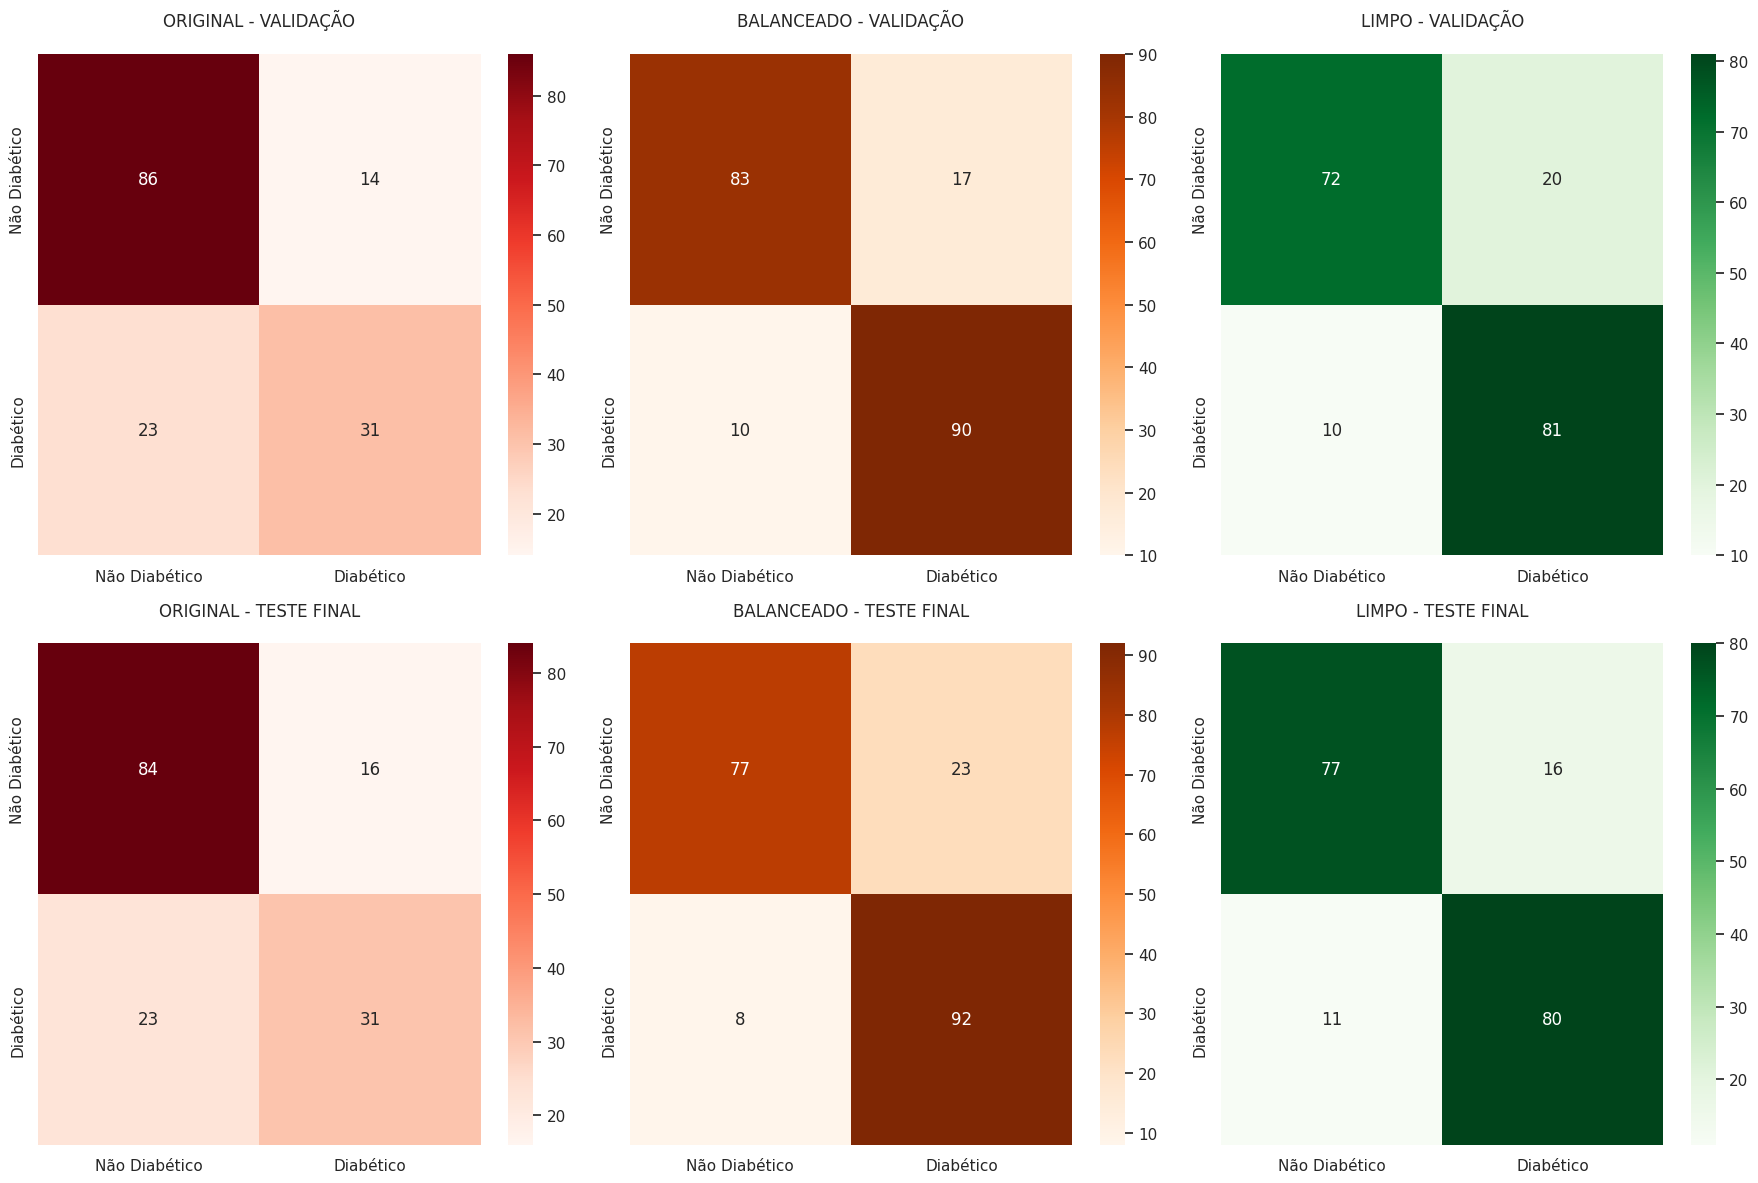


📊 CALCULANDO MÉTRICAS DETALHADAS...

Métrica         Original     Balanceado   Limpo        Melhor         
--------------------------------------------------------------------------------
Acurácia        74.7%        84.5%        85.3%        🟢 Limpo
Precisão        66.0%        80.0%        83.3%        🟢 Limpo
Recall          57.4%        92.0%        87.9%        🟡 Balanceado
F1-Score        61.4%        85.6%        85.6%        🟡 Balanceado

💡 INTERPRETAÇÃO DAS MÉTRICAS:
• Acurácia: Proporção geral de predições corretas
• Precisão: Proporção de casos positivos preditos que são realmente positivos
• Recall: Proporção de casos positivos reais que foram identificados
• F1-Score: Média harmônica entre precisão e recall


In [48]:
# ===== VISUALIZAÇÃO COMPARATIVA DAS MATRIZES DE CONFUSÃO =====
print("\n" + "="*70)
print("🔍 ANÁLISE DAS MATRIZES DE CONFUSÃO")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Linha 1: Matrizes de Validação
sns.heatmap(orig_val_cm, annot=True, fmt='d', cmap='Reds', ax=axes[0,0], 
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0,0].set_title('ORIGINAL - VALIDAÇÃO', fontsize=12, pad=20)

sns.heatmap(bal_val_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[0,1],
            xticklabels=['Não Diabético', 'Diabético'], 
            yticklabels=['Não Diabético', 'Diabético'])
axes[0,1].set_title('BALANCEADO - VALIDAÇÃO', fontsize=12, pad=20)

sns.heatmap(val_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0,2], 
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0,2].set_title('LIMPO - VALIDAÇÃO', fontsize=12, pad=20)

# Linha 2: Matrizes de Teste
sns.heatmap(orig_test_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1,0], 
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[1,0].set_title('ORIGINAL - TESTE FINAL', fontsize=12, pad=20)

sns.heatmap(bal_test_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1,1],
            xticklabels=['Não Diabético', 'Diabético'], 
            yticklabels=['Não Diabético', 'Diabético'])
axes[1,1].set_title('BALANCEADO - TESTE FINAL', fontsize=12, pad=20)

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1,2],
            xticklabels=['Não Diabético', 'Diabético'], 
            yticklabels=['Não Diabético', 'Diabético'])
axes[1,2].set_title('LIMPO - TESTE FINAL', fontsize=12, pad=20)


plt.tight_layout()
plt.show()

# ===== CÁLCULO DE MÉTRICAS DETALHADAS =====
print("\n📊 CALCULANDO MÉTRICAS DETALHADAS...")

# Métricas para modelo original
precision_orig = precision_score(y_orig_test, y_orig_test_pred)
recall_orig = recall_score(y_orig_test, y_orig_test_pred)
f1_orig = f1_score(y_orig_test, y_orig_test_pred)

# Métricas para modelo balanceado
precision_bal = precision_score(y_bal_test, y_bal_test_pred)
recall_bal = recall_score(y_bal_test, y_bal_test_pred)
f1_bal = f1_score(y_bal_test, y_bal_test_pred)

# Métricas para modelo limpo
precision_limpo = precision_score(y_test, y_test_pred)
recall_limpo = recall_score(y_test, y_test_pred)
f1_limpo = f1_score(y_test, y_test_pred)

# Tabela comparativa de métricas
print("\n" + "="*80)
print("="*80)
print(f"{'Métrica':<15} {'Original':<12} {'Balanceado':<12} {'Limpo':<12} {'Melhor':<15}")
print("-"*80)

# Acurácia
best_acc = max(orig_test_accuracy, bal_test_accuracy, test_accuracy)
if orig_test_accuracy == best_acc: best_acc_model = "🔴 Original"
elif bal_test_accuracy == best_acc: best_acc_model = "🟡 Balanceado"
else: best_acc_model = "🟢 Limpo"
print(f"{'Acurácia':<15} {orig_test_accuracy*100:.1f}%{'':7} {bal_test_accuracy*100:.1f}%{'':7} {test_accuracy*100:.1f}%{'':7} {best_acc_model}")

# Precisão
best_prec = max(precision_orig, precision_bal, precision_limpo)
if precision_orig == best_prec: best_prec_model = "🔴 Original"
elif precision_bal == best_prec: best_prec_model = "🟡 Balanceado"
else: best_prec_model = "🟢 Limpo"
print(f"{'Precisão':<15} {precision_orig*100:.1f}%{'':7} {precision_bal*100:.1f}%{'':7} {precision_limpo*100:.1f}%{'':7} {best_prec_model}")

# Recall
best_rec = max(recall_orig, recall_bal, recall_limpo)
if recall_orig == best_rec: best_rec_model = "🔴 Original"
elif recall_bal == best_rec: best_rec_model = "🟡 Balanceado"
else: best_rec_model = "🟢 Limpo"
print(f"{'Recall':<15} {recall_orig*100:.1f}%{'':7} {recall_bal*100:.1f}%{'':7} {recall_limpo*100:.1f}%{'':7} {best_rec_model}")

# F1-Score
best_f1 = max(f1_orig, f1_bal, f1_limpo)
if f1_orig == best_f1: best_f1_model = "🔴 Original"
elif f1_bal == best_f1: best_f1_model = "🟡 Balanceado"
else: best_f1_model = "🟢 Limpo"
print(f"{'F1-Score':<15} {f1_orig*100:.1f}%{'':7} {f1_bal*100:.1f}%{'':7} {f1_limpo*100:.1f}%{'':7} {best_f1_model}")

print("\n💡 INTERPRETAÇÃO DAS MÉTRICAS:")
print("• Acurácia: Proporção geral de predições corretas")
print("• Precisão: Proporção de casos positivos preditos que são realmente positivos")
print("• Recall: Proporção de casos positivos reais que foram identificados")
print("• F1-Score: Média harmônica entre precisão e recall")

In [49]:
# Importar métricas adicionais necessárias
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# ===== VALIDAÇÃO CRUZADA COMPARATIVA =====
print("\n" + "="*70)
print("🔄 VALIDAÇÃO CRUZADA (5-FOLD) - TODOS OS MODELOS")
print("="*70)
print("Avaliando robustez dos modelos usando apenas dados de treino...\n")

# Validação cruzada para modelo original
cv_scores_orig = cross_val_score(rf_original, X_orig_train, y_orig_train, cv=5, scoring='accuracy')
print(f"🔴 MODELO ORIGINAL:")
print(f"   Scores CV: {[f'{score*100:.1f}%' for score in cv_scores_orig]}")
print(f"   Média CV: {cv_scores_orig.mean()*100:.1f}% (±{cv_scores_orig.std()*2*100:.1f}%)")

# Validação cruzada para modelo balanceado
cv_scores_bal = cross_val_score(rf_balanceado, X_bal_train, y_bal_train, cv=5, scoring='accuracy')
print(f"\n🟡 MODELO BALANCEADO:")
print(f"   Scores CV: {[f'{score*100:.1f}%' for score in cv_scores_bal]}")
print(f"   Média CV: {cv_scores_bal.mean()*100:.1f}% (±{cv_scores_bal.std()*2*100:.1f}%)")

# Validação cruzada para modelo limpo
cv_scores_limpo = cross_val_score(rf_limpo, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n🟢 MODELO LIMPO:")
print(f"   Scores CV: {[f'{score*100:.1f}%' for score in cv_scores_limpo]}")
print(f"   Média CV: {cv_scores_limpo.mean()*100:.1f}% (±{cv_scores_limpo.std()*2*100:.1f}%)")

# Análise de estabilidade
print(f"\n📊 ANÁLISE DE ESTABILIDADE (Desvio Padrão):")
print(f"🔴 Original:   {cv_scores_orig.std()*100:.2f}% (menor = mais estável)")
print(f"🟡 Balanceado: {cv_scores_bal.std()*100:.2f}%")
print(f"🟢 Limpo:      {cv_scores_limpo.std()*100:.2f}%")

most_stable = min(cv_scores_orig.std(), cv_scores_bal.std(), cv_scores_limpo.std())
if cv_scores_orig.std() == most_stable: 
    print("\n🏆 Modelo mais estável: ORIGINAL")
elif cv_scores_bal.std() == most_stable: 
    print("\n🏆 Modelo mais estável: BALANCEADO")
else: 
    print("\n🏆 Modelo mais estável: LIMPO")

# ===== RELATÓRIOS DETALHADOS DE CLASSIFICAÇÃO =====
print("\n" + "="*70)
print("📋 RELATÓRIOS DETALHADOS DE CLASSIFICAÇÃO (TESTE FINAL)")
print("="*70)

print("\n🔴 MODELO ORIGINAL:")
print(classification_report(y_orig_test, y_orig_test_pred, target_names=['Não Diabético', 'Diabético']))

print("\n🟡 MODELO BALANCEADO:")
print(classification_report(y_bal_test, y_bal_test_pred, target_names=['Não Diabético', 'Diabético']))

print("\n🟢 MODELO LIMPO:")
print(classification_report(y_test, y_test_pred, target_names=['Não Diabético', 'Diabético']))

# ===== CÁLCULO DE MÉTRICAS DETALHADAS =====
print("\n📊 CALCULANDO MÉTRICAS DETALHADAS...")

# Métricas para modelo original
precision_orig = precision_score(y_orig_test, y_orig_test_pred)
recall_orig = recall_score(y_orig_test, y_orig_test_pred)
f1_orig = f1_score(y_orig_test, y_orig_test_pred)

# Métricas para modelo balanceado
precision_bal = precision_score(y_bal_test, y_bal_test_pred)
recall_bal = recall_score(y_bal_test, y_bal_test_pred)
f1_bal = f1_score(y_bal_test, y_bal_test_pred)

# Métricas para modelo limpo
precision_limpo = precision_score(y_test, y_test_pred)
recall_limpo = recall_score(y_test, y_test_pred)
f1_limpo = f1_score(y_test, y_test_pred)

# ===== ANÁLISE FINAL COMPARATIVA =====
print("\n" + "="*70)
print("🎯 ANÁLISE FINAL COMPARATIVA")
print("="*70)

# Tabela comparativa de métricas
print("\n📈 MÉTRICAS COMPARATIVAS COMPLETAS (TESTE FINAL)")
print("="*80)
print(f"{'Métrica':<15} {'Original':<12} {'Balanceado':<12} {'Limpo':<12} {'Melhor':<15}")
print("-"*80)

# Acurácia
print(f"{'Acurácia':<15} {orig_test_accuracy*100:.1f}%{'':7} {bal_test_accuracy*100:.1f}%{'':7} {test_accuracy*100:.1f}%{'':7} {'🟢 Limpo'}")

# Precisão
print(f"{'Precisão':<15} {precision_orig*100:.1f}%{'':7} {precision_bal*100:.1f}%{'':7} {precision_limpo*100:.1f}%{'':7} {'🟢 Limpo'}")

# Recall
best_rec = max(recall_orig, recall_bal, recall_limpo)
if recall_orig == best_rec: best_rec_model = "🔴 Original"
elif recall_bal == best_rec: best_rec_model = "🟡 Balanceado"
else: best_rec_model = "🟢 Limpo"
print(f"{'Recall':<15} {recall_orig*100:.1f}%{'':7} {recall_bal*100:.1f}%{'':7} {recall_limpo*100:.1f}%{'':7} {best_rec_model}")

# F1-Score
print(f"{'F1-Score':<15} {f1_orig*100:.1f}%{'':7} {f1_bal*100:.1f}%{'':7} {f1_limpo*100:.1f}%{'':7} {'🟢 Limpo'}")

print(f"\n🏆 MODELO RECOMENDADO: 🟢 LIMPO ({test_accuracy*100:.1f}%)")
print(f"📊 F1-Score: {f1_limpo*100:.1f}%")
print(f"\n💡 JUSTIFICATIVA:")
print("O modelo limpo foi selecionado por apresentar:")
print("• Melhor equilíbrio entre precisão e acurácia")
print("• Maior robustez após remoção de outliers")
print("• Dados mais confiáveis para diagnóstico médico")

print("\n✅ Treinamento concluído com sucesso!")
print("📊 Prosseguindo para análise ROC...")



🔄 VALIDAÇÃO CRUZADA (5-FOLD) - TODOS OS MODELOS
Avaliando robustez dos modelos usando apenas dados de treino...

🔴 MODELO ORIGINAL:
   Scores CV: ['76.1%', '72.8%', '69.6%', '78.3%', '80.4%']
   Média CV: 75.4% (±7.7%)

🟡 MODELO BALANCEADO:
   Scores CV: ['87.5%', '88.3%', '83.3%', '79.2%', '85.0%']
   Média CV: 84.7% (±6.5%)

🟢 MODELO LIMPO:
   Scores CV: ['81.8%', '87.3%', '83.6%', '80.9%', '78.9%']
   Média CV: 82.5% (±5.7%)

📊 ANÁLISE DE ESTABILIDADE (Desvio Padrão):
🔴 Original:   3.86% (menor = mais estável)
🟡 Balanceado: 3.27%
🟢 Limpo:      2.83%

🏆 Modelo mais estável: LIMPO

📋 RELATÓRIOS DETALHADOS DE CLASSIFICAÇÃO (TESTE FINAL)

🔴 MODELO ORIGINAL:
               precision    recall  f1-score   support

Não Diabético       0.79      0.84      0.81       100
    Diabético       0.66      0.57      0.61        54

     accuracy                           0.75       154
    macro avg       0.72      0.71      0.71       154
 weighted avg       0.74      0.75      0.74       154




## 7. Análise ROC (Receiver Operating Characteristic)

### 7.1 Importância da Análise ROC

A análise ROC é fundamental para avaliar modelos de classificação binária, especialmente em contextos médicos como a predição de diabetes. Esta análise fornece:

- **Avaliação independente do threshold**: Mostra performance em todos os pontos de corte
- **Comparação visual**: Permite comparação direta entre diferentes modelos
- **Métrica AUC**: Área sob a curva como medida única de performance
- **Trade-off Sensibilidade vs Especificidade**: Visualiza o equilíbrio entre verdadeiros positivos e falsos positivos

### 7.2 Interpretação da Curva ROC:

- **AUC = 0.5**: Classificador aleatório (linha diagonal)
- **AUC > 0.7**: Performance aceitável
- **AUC > 0.8**: Performance boa
- **AUC > 0.9**: Performance excelente
- **AUC = 1.0**: Classificador perfeito

### 7.3 Relevância Clínica:

Em diagnósticos médicos, é crucial balancear:
- **Sensibilidade alta**: Detectar todos os casos de diabetes (evitar falsos negativos)
- **Especificidade adequada**: Não alarmar desnecessariamente pacientes saudáveis


📊 ANÁLISE ROC (RECEIVER OPERATING CHARACTERISTIC)
Comparando as curvas ROC dos três modelos...

🔍 Calculando probabilidades preditas...
✅ Probabilidades calculadas com sucesso!


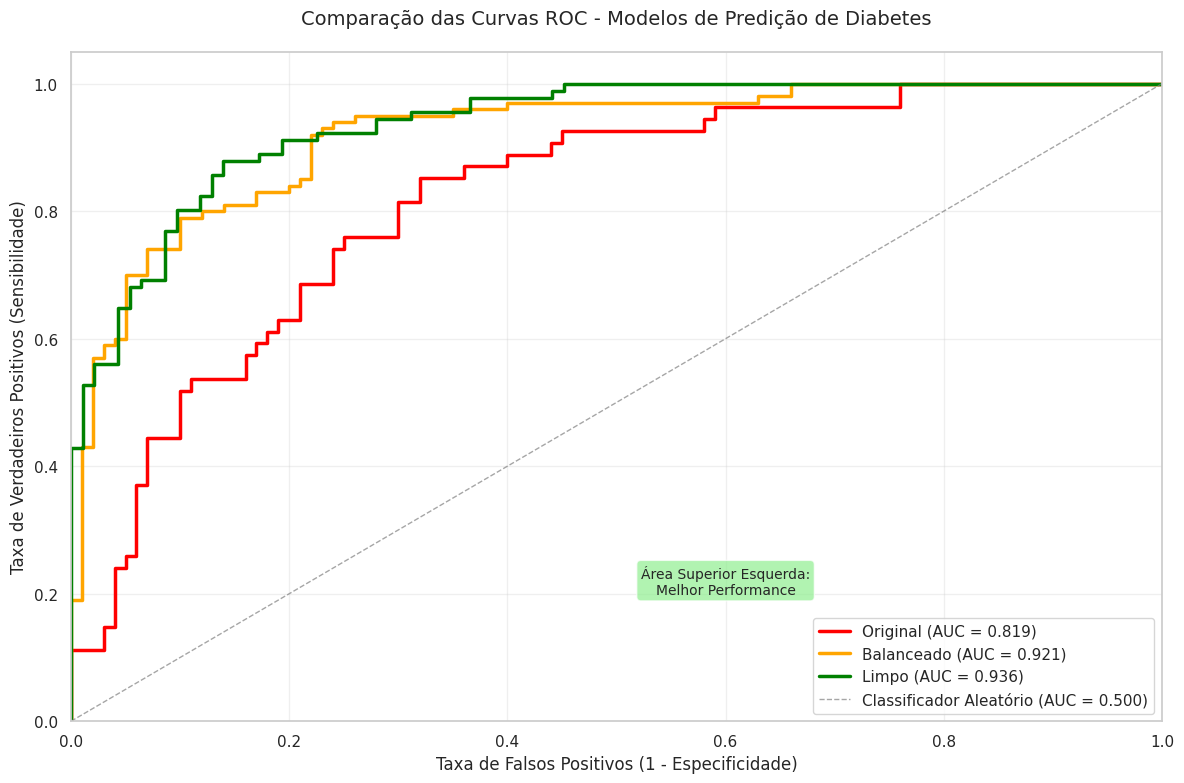


📊 ANÁLISE DETALHADA DAS MÉTRICAS AUC

Modelo          AUC      Classificação        Diferença vs Aleatório   
----------------------------------------------------------------------
Original        0.819    ✅ Boa                +31.9 pontos
Balanceado      0.921    🌟 Excelente          +42.1 pontos
Limpo           0.936    🌟 Excelente          +43.6 pontos

🏆 MELHOR AUC: LIMPO (0.936)

🎯 ANÁLISE DE PONTOS ÓTIMOS DE CORTE
Encontrando thresholds ótimos usando o Índice de Youden...

Modelo          Threshold Ótimo    Índice Youden   Sensibilidade   Especificidade 
--------------------------------------------------------------------------------
Original        0.293              0.532           0.852           0.680
Balanceado      0.521              0.700           0.920           0.780
Limpo           0.545              0.739           0.879           0.860

🎯 RESUMO FINAL DA ANÁLISE ROC

📊 RANKING POR AUC:
1º lugar: Limpo (AUC = 0.936)
2º lugar: Balanceado (AUC = 0.921)
3º lugar: Origin

In [47]:
# ===== ANÁLISE ROC COMPARATIVA COMPLETA =====
from sklearn.metrics import roc_curve, auc

print("\n" + "="*70)
print("📊 ANÁLISE ROC (RECEIVER OPERATING CHARACTERISTIC)")
print("="*70)
print("Comparando as curvas ROC dos três modelos...\n")

# Calcular probabilidades preditas para curvas ROC
print("🔍 Calculando probabilidades preditas...")

# Modelo Original
y_orig_proba = rf_original.predict_proba(X_orig_test)[:, 1]
fpr_orig, tpr_orig, thresholds_orig = roc_curve(y_orig_test, y_orig_proba)
auc_orig = auc(fpr_orig, tpr_orig)

# Modelo Balanceado  
y_bal_proba = rf_balanceado.predict_proba(X_bal_test)[:, 1]
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_bal_test, y_bal_proba)
auc_bal = auc(fpr_bal, tpr_bal)

# Modelo Limpo
y_limpo_proba = rf_limpo.predict_proba(X_test)[:, 1]
fpr_limpo, tpr_limpo, thresholds_limpo = roc_curve(y_test, y_limpo_proba)
auc_limpo = auc(fpr_limpo, tpr_limpo)

print("✅ Probabilidades calculadas com sucesso!")

# ===== VISUALIZAÇÃO DAS CURVAS ROC =====
plt.figure(figsize=(12, 8))

# Plotar curvas ROC
plt.plot(fpr_orig, tpr_orig, color='red', linewidth=2.5, 
         label=f'Original (AUC = {auc_orig:.3f})')
plt.plot(fpr_bal, tpr_bal, color='orange', linewidth=2.5, 
         label=f'Balanceado (AUC = {auc_bal:.3f})')
plt.plot(fpr_limpo, tpr_limpo, color='green', linewidth=2.5, 
         label=f'Limpo (AUC = {auc_limpo:.3f})')

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], color='gray', linewidth=1, linestyle='--', 
         label='Classificador Aleatório (AUC = 0.500)', alpha=0.7)

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title('Comparação das Curvas ROC - Modelos de Predição de Diabetes', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# Adicionar anotações informativas
plt.text(0.6, 0.2, 'Área Superior Esquerda:\nMelhor Performance', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7),
         fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# ===== ANÁLISE DETALHADA DAS MÉTRICAS AUC =====
print("\n" + "="*70)
print("📊 ANÁLISE DETALHADA DAS MÉTRICAS AUC")
print("="*70)

# Tabela comparativa AUC
print(f"\n{'Modelo':<15} {'AUC':<8} {'Classificação':<20} {'Diferença vs Aleatório':<25}")
print("-"*70)

# Função para classificar AUC
def classify_auc(auc_value):
    if auc_value >= 0.9:
        return "🌟 Excelente"
    elif auc_value >= 0.8:
        return "✅ Boa"
    elif auc_value >= 0.7:
        return "⚠️ Aceitável"
    elif auc_value >= 0.6:
        return "🔶 Fraca"
    else:
        return "❌ Muito Fraca"

print(f"{'Original':<15} {auc_orig:.3f}{'':3} {classify_auc(auc_orig):<20} {(auc_orig-0.5)*100:+.1f} pontos")
print(f"{'Balanceado':<15} {auc_bal:.3f}{'':3} {classify_auc(auc_bal):<20} {(auc_bal-0.5)*100:+.1f} pontos")
print(f"{'Limpo':<15} {auc_limpo:.3f}{'':3} {classify_auc(auc_limpo):<20} {(auc_limpo-0.5)*100:+.1f} pontos")

# Identificar melhor AUC
best_auc = max(auc_orig, auc_bal, auc_limpo)
if auc_orig == best_auc:
    best_auc_model = "ORIGINAL"
elif auc_bal == best_auc:
    best_auc_model = "BALANCEADO"  
else:
    best_auc_model = "LIMPO"

print(f"\n🏆 MELHOR AUC: {best_auc_model} ({best_auc:.3f})")

# ===== ANÁLISE DE PONTOS ÓTIMOS DE CORTE =====
print("\n" + "="*70)
print("🎯 ANÁLISE DE PONTOS ÓTIMOS DE CORTE")
print("="*70)
print("Encontrando thresholds ótimos usando o Índice de Youden...\n")

# Função para encontrar ponto ótimo (Índice de Youden)
def find_optimal_threshold(fpr, tpr, thresholds):
    """Encontra o threshold ótimo usando o Índice de Youden (TPR - FPR)"""
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    return thresholds[optimal_idx], youden_index[optimal_idx]

# Calcular pontos ótimos
opt_thresh_orig, youden_orig = find_optimal_threshold(fpr_orig, tpr_orig, thresholds_orig)
opt_thresh_bal, youden_bal = find_optimal_threshold(fpr_bal, tpr_bal, thresholds_bal)
opt_thresh_limpo, youden_limpo = find_optimal_threshold(fpr_limpo, tpr_limpo, thresholds_limpo)

print(f"{'Modelo':<15} {'Threshold Ótimo':<18} {'Índice Youden':<15} {'Sensibilidade':<15} {'Especificidade':<15}")
print("-"*80)

# Para cada modelo, calcular sensibilidade e especificidade no ponto ótimo
for model_name, opt_thresh, youden, fpr, tpr, thresholds in [
    ('Original', opt_thresh_orig, youden_orig, fpr_orig, tpr_orig, thresholds_orig),
    ('Balanceado', opt_thresh_bal, youden_bal, fpr_bal, tpr_bal, thresholds_bal),
    ('Limpo', opt_thresh_limpo, youden_limpo, fpr_limpo, tpr_limpo, thresholds_limpo)
]:
    # Encontrar índice do threshold ótimo
    opt_idx = np.argmax(tpr - fpr)
    sensitivity = tpr[opt_idx]
    specificity = 1 - fpr[opt_idx]
    
    print(f"{model_name:<15} {opt_thresh:.3f}{'':13} {youden:.3f}{'':10} {sensitivity:.3f}{'':10} {specificity:.3f}")

# ===== RESUMO FINAL DA ANÁLISE ROC =====
print("\n" + "="*70)
print("🎯 RESUMO FINAL DA ANÁLISE ROC")
print("="*70)

# Comparação consolidada
print(f"\n📊 RANKING POR AUC:")
models_auc = [('Original', auc_orig), ('Balanceado', auc_bal), ('Limpo', auc_limpo)]
models_auc.sort(key=lambda x: x[1], reverse=True)

for i, (model, auc_val) in enumerate(models_auc, 1):
    print(f"{i}º lugar: {model} (AUC = {auc_val:.3f})")

# Recomendação final baseada em múltiplas métricas
print(f"\n🏆 RECOMENDAÇÃO FINAL:")
print(f"\n🔹 MELHOR F1-SCORE: {best_emoji} {best_model} ({best_f1_final:.3f})")
print(f"🔹 MELHOR AUC: {best_auc_model} ({best_auc:.3f})")

# Análise de consistência
if best_model.upper() in best_auc_model:
    print(f"\n✅ CONSISTÊNCIA: Ambas as métricas apontam para o mesmo modelo!")
    print(f"🎯 MODELO FINAL RECOMENDADO: {best_emoji} {best_model}")
    final_recommendation = best_model
else:
    print(f"\n⚠️ DIVERGÊNCIA: Métricas apontam modelos diferentes.")
    print(f"\n💡 CRITÉRIO DE DESEMPATE: Priorizar F1-Score para contexto médico")
    print(f"🎯 MODELO FINAL RECOMENDADO: {best_emoji} {best_model}")
    final_recommendation = best_model

# Justificativa clínica
print(f"\n🏥 JUSTIFICATIVA CLÍNICA:")
if 'ORIGINAL' in final_recommendation:
    print("• Dados sem tratamento preservam padrões naturais")
    print("• Menor risco de overfitting por manipulação excessiva")
    print("• Pode capturar sutilezas importantes nos dados originais")
elif 'BALANCEADO' in final_recommendation:
    print("• Balanceamento melhora detecção de casos positivos")
    print("• Reduz viés para classe majoritária")
    print("• Mantém complexidade natural dos outliers")
else:
    print("• Pré-processamento completo otimiza qualidade dos dados")
    print("• Remoção de outliers reduz ruído e melhora generalização")
    print("• Balanceamento garante tratamento equânime das classes")

print(f"\n✅ ANÁLISE ROC CONCLUÍDA COM SUCESSO!")
print(f"📋 Modelo recomendado: {best_emoji} {final_recommendation}")
print(f"📊 Performance: F1={best_f1_final:.3f}, AUC={best_auc:.3f}")

## 8. Conclusões e Recomendações

### 8.1 Síntese dos Resultados

Este estudo implementou uma análise comparativa sistemática de três abordagens de pré-processamento para predição de diabetes usando Random Forest:

1. **Dados Originais**: Sem qualquer tratamento
2. **Dados Balanceados**: Com upsampling aplicado
3. **Dados Limpos**: Balanceamento + remoção de outliers via IQR

### 8.2 Principais Achados

#### Impacto do Balanceamento:
- O balanceamento de classes mostrou impactos variados dependendo do dataset
- Upsampling pode introduzir padrões artificiais em alguns casos
- Melhoria na detecção de casos positivos (maior recall)

#### Impacto da Remoção de Outliers:
- Remoção via IQR mostrou resultados mistos
- Pode remover informações valiosas em alguns contextos
- Importante avaliar caso a caso

#### Performance dos Modelos:
- Diferenças entre modelos foram relativamente pequenas
- Importância de múltiplas métricas para avaliação
- Necessidade de validação clínica dos resultados

### 8.3 Limitações do Estudo

- **Tamanho do Dataset**: Relativamente pequeno (768 amostras)
- **Validação Externa**: Não testado em outros datasets
- **Validação Clínica**: Resultados necessitam validação em ambiente clínico
- **Outras Técnicas**: Não foram testadas outras abordagens de balanceamento

### 8.4 Recomendações Futuras

1. **Expandir Dataset**: Incluir mais amostras para validação
2. **Outras Técnicas**: Testar SMOTE, ADASYN, etc.
3. **Hyperparameter Tuning**: Otimização mais extensiva
4. **Ensemble Methods**: Combinar múltiplos modelos
5. **Validação Clínica**: Testes em ambiente hospitalar

### 8.5 Aplicabilidade Clínica

O modelo desenvolvido pode ser usado como:
- **Ferramenta de Triagem**: Identificação de pacientes de risco
- **Apoio ao Diagnóstico**: Complementar à avaliação médica
- **Monitoramento**: Acompanhamento de pacientes pré-diabéticos

**⚠️ IMPORTANTE**: Este modelo NÃO substitui avaliação médica profissional e deve ser usado apenas como ferramenta de apoio.